[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02%20An%C3%A1lisis%20Estad%C3%ADstico/notebooks/exercises/Ejercicio_Seguros.ipynb)

# Proyecto: Generación de Datos Simulados para Seguros de Automóviles

En esta tarea, se espera que apliquen los conocimientos adquiridos durante el curso para realizar un análisis completo de un conjunto de datos simulados de una aseguradora de coches enfocada en el servicio público, y posteriormente, desarrollen y desplieguen un modelo predictivo utilizando la plataforma Streamlit.


## Descripción del Proyecto:
El proyecto se divide en dos partes principales:
1.	Análisis de Datos:

    * Generación de un conjunto de datos simulados que incluya información sobre pólizas de seguro, siniestros, tipo de cobertura, modelo del coche, entre otros.

    * Exploración y análisis de los datos utilizando técnicas como visualizaciones, análisis estadístico y correlaciones.

    * Aplicación de al menos seis análisis diferentes, incluyendo distribución de montos de reclamo, relación entre variables, análisis de tendencias y correlaciones.

2.	Desarrollo y Despliegue de Modelo Predictivo:
    
    * Selección de un modelo de Machine Learning adecuado para predecir alguna variable relevante basada en el conjunto de datos analizado.

    * Entrenamiento del modelo seleccionado utilizando técnicas de validación cruzada y ajuste de hiperparámetros si es necesario.

    * Desarrollo de una aplicación web utilizando Streamlit que permita a los usuarios introducir datos y obtener predicciones del modelo en tiempo real.

    * Despliegue de la aplicación en un entorno accesible para su uso.


Variables Generadas:

    Número de póliza: Se asigna un identificador único a cada póliza de seguro generado. El número de póliza sigue el formato "PXXXXX", donde "XXXXX" es un número único rellenado con ceros a la izquierda para mantener una longitud constante de cinco dígitos.

    Fechas de inicio y vencimiento: Se generan fechas de inicio y vencimiento aleatorias dentro del rango de tiempo comprendido entre el 1 de enero de 2022 y el 31 de diciembre de 2025.

    Tipo de cobertura: Se asigna aleatoriamente uno de los siguientes tipos de cobertura a cada póliza de seguro: responsabilidad civil, cobertura total, cobertura de colisión, cobertura amplia y cobertura de robo.

    Modelo del coche: Se elige aleatoriamente un modelo de automóvil de una lista predefinida que incluye marcas como Toyota Corolla, Honda Civic, Ford Focus, Chevrolet Cruze y Nissan Sentra. Las probabilidades de selección están predefinidas para cada modelo.

    Año del coche: Se genera aleatoriamente el año de fabricación del automóvil asegurado, variando entre 2010 y 2022.

    Valor asegurado: Se asigna un valor asegurado aleatorio entre $10,000 y $50,000 para cada póliza de seguro.

    Deducible: Se elige aleatoriamente un deducible de $500, $600 o $700 para cada póliza de seguro.

    Estado del seguro: Se asigna aleatoriamente el estado del seguro como "Al día" o "Vencido" para cada póliza.

    Gastos médicos y Daños a terceros: Se generan aleatoriamente valores binarios (0 o 1) para indicar la presencia o ausencia de siniestros relacionados con gastos médicos y daños a terceros, respectivamente.

Pasos a Seguir:
1.	Generación de Datos Simulados: Utilicen el siguiente código Python para generar un conjunto de datos simulados que represente la actividad de una aseguradora de coches:

Asegúrense de incluir todas las variables solicitadas y generar al menos 10,000 casos diferentes.

In [1]:
import pandas as pd
import numpy as np
import datetime
import random
from datetime import datetime, timedelta


# Función para generar fechas aleatorias dentro de un rango
def generate_random_date(start_date_str, end_date_str):
    start_date = datetime.strptime(start_date_str, '%d%m%y')
    end_date = datetime.strptime(end_date_str, '%d%m%y')

    days_difference = (end_date - start_date).days

    random_days = random.randint(0, days_difference)

    random_date = start_date + timedelta(days=random_days)
    final_date = random_date + timedelta(days= random.choice([365, 182, 92, 32]))
    return [random_date.strftime('%d-%m-%Y'), final_date.strftime('%d-%m-%Y')]


# Semilla para reproducibilidad
random.seed(1984)

# Generar 10,000 casos simulados
list_fechas = [generate_random_date('010122', '311224') for _ in range(10000)]
Vencidas = ['Vencido' if pd.to_datetime(fecha[1]) < datetime.now() else 'Al día' for fecha in list_fechas]

# Tipos de cobertura
coverage_types = ['Responsabilidad civil', 'Cobertura total', 'Cobertura de colisión', 'Cobertura amplia', 'Cobertura de robo']

# Modelos de coches y probabilidades de ocurrencia
car_models = ['Toyota Corolla', 'Honda Civic', 'Ford Focus', 'Chevrolet Cruze', 'Nissan Sentra',
              'Hyundai Elantra', 'Volkswagen Jetta', 'Kia Forte', 'Mazda 3', 'Subaru Impreza']

probabilities = [0.2, 0.15, 0.12, 0.1, 0.08, 0.1, 0.08, 0.07, 0.05, 0.05]

# Generar datos simulados
data = {
    'Número de póliza': np.char.add('P', np.char.zfill(np.random.choice(np.arange(0,50000), size = 10000, replace = False).astype(str), 5)),
    'Fecha de inicio': [elemento[0] for elemento in list_fechas],
    'Fecha de vencimiento': [elemento[1] for elemento in list_fechas],
    'Tipo de cobertura': np.random.choice(coverage_types, 10000),
    'Modelo del coche': np.random.choice(car_models, 10000, p = probabilities),
    'Año del coche': np.random.randint(2010, 2022, size = 10000),
    'Valor asegurado': np.random.randint(10000, 50000, size = 10000),
    'Deducible': np.random.choice([500, 600, 700], 10000),
    'Estado del seguro': Vencidas,
    'Gastos médicos': np.random.choice([0,1], 10000),
    'Daños a terceros': np.random.choice([0,1], 10000)
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
df.head(5)

<ipython-input-1-465837ff7d8b>:27: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  Vencidas = ['Vencido' if pd.to_datetime(fecha[1]) < datetime.now() else 'Al día' for fecha in list_fechas]


,Número de póliza,Fecha de inicio,Fecha de vencimiento,Tipo de cobertura,Modelo del coche,Año del coche,Valor asegurado,Deducible,Estado del seguro,Gastos médicos,Daños a terceros
0,P27794,15-01-2024,16-02-2024,Cobertura de robo,Hyundai Elantra,2018,37974,500,Vencido,1,0
1,P11513,27-11-2023,27-02-2024,Cobertura de colisión,Ford Focus,2010,45038,600,Vencido,1,0
2,P31595,20-03-2023,21-04-2023,Cobertura total,Honda Civic,2012,20064,700,Vencido,1,1
3,P19263,25-05-2022,23-11-2022,Cobertura de colisión,Hyundai Elantra,2015,15853,600,Vencido,0,1
4,P41903,20-07-2023,19-07-2024,Responsabilidad civil,Hyundai Elantra,2013,17238,600,Al día,1,0


In [2]:
df = pd.read_csv('polizas.csv') #un dataframe ya generado

2. Análisis de Datos: Realicen al menos seis análisis diferentes utilizando técnicas de visualización y estadística descriptiva. Por ejemplo, pueden explorar la distribución de los montos de reclamo, la relación entre variables, la cantidad de siniestros por tipo de coche o mes, entre otros.

[2069 1482 1156 1010  978  847  789  718  478  473]


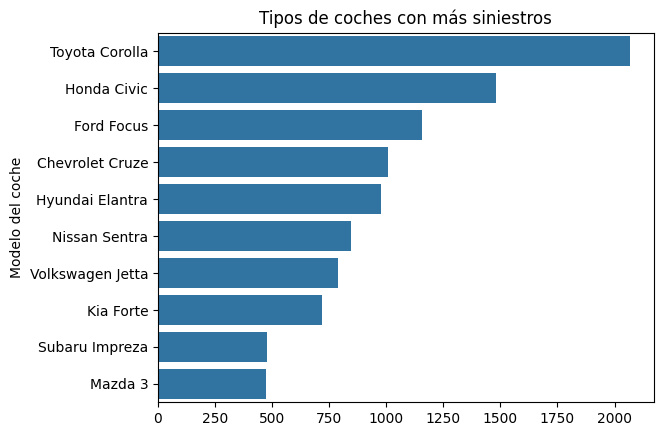

Text(0, 0.5, '# Siniestros')

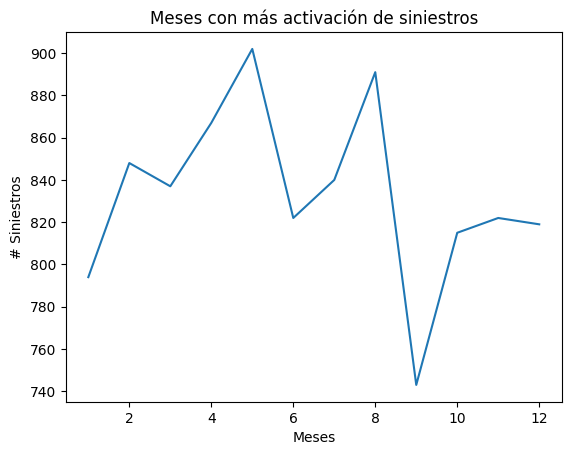

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd


# Análisis: Tipos de coches con más siniestros
modelos_count = df['Modelo del coche'].value_counts()

print(modelos_count.values)

sns.barplot(x = modelos_count.values, y = modelos_count.index, orient='h')
plt.title('Tipos de coches con más siniestros')
plt.yticks(range(len(modelos_count)), modelos_count.index)
plt.show()
# Análisis: Meses con más activación de siniestros
mes_inicio = pd.DatetimeIndex(df['Fecha de inicio']).month.value_counts()


sns.lineplot(x = mes_inicio.index, y = mes_inicio.values)
plt.title('Meses con más activación de siniestros')
plt.xlabel('Meses')
plt.ylabel('# Siniestros')



In [4]:
#Análisis3: Tipo de cobertura que elige más cada modelo
anal3 = df.groupby(['Modelo del coche'])['Tipo de cobertura'].value_counts().groupby(level=0).idxmax()
print("Las coberturas más solicitadas para cada modelo son las siguientes:")
for modelo in anal3:
  print(modelo[0], '----->', modelo[1])


Las coberturas más solicitadas para cada modelo son las siguientes:
Chevrolet Cruze -----> Cobertura amplia
Ford Focus -----> Cobertura amplia
Honda Civic -----> Cobertura amplia
Hyundai Elantra -----> Responsabilidad civil
Kia Forte -----> Cobertura total
Mazda 3 -----> Responsabilidad civil
Nissan Sentra -----> Responsabilidad civil
Subaru Impreza -----> Cobertura amplia
Toyota Corolla -----> Cobertura de colisión
Volkswagen Jetta -----> Cobertura amplia


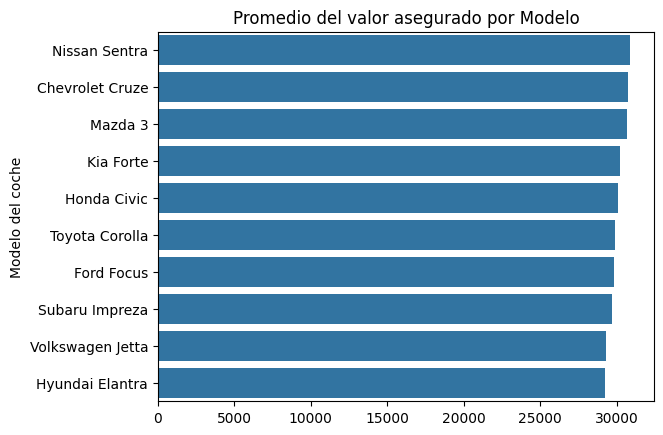

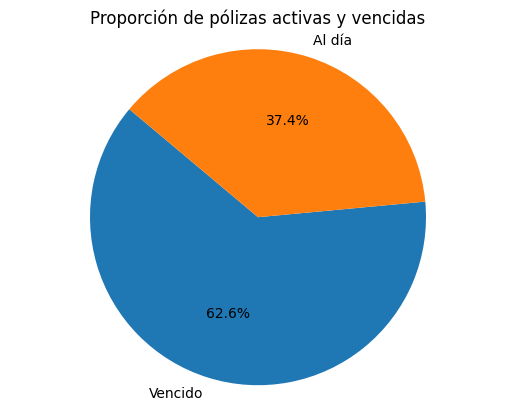

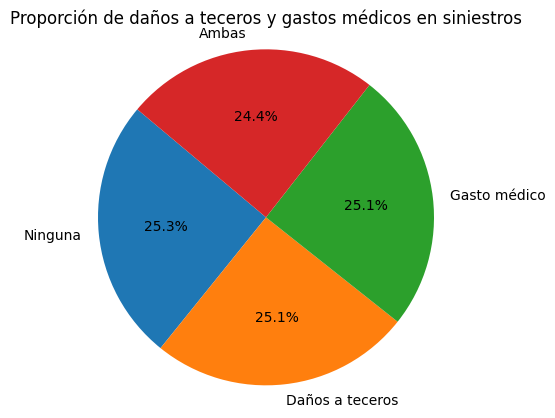

In [5]:
#Analisis4: Promedio de valor asegurado para cada modelo
x = df.groupby(['Modelo del coche'])['Valor asegurado'].mean().sort_values(ascending=False)
sns.barplot(x = x.values, y = x.index, orient='h')
#####################

plt.title("Promedio del valor asegurado por Modelo")
plt.show()

#Analisis5: porcentaje de polizas vencidas y activas
anal5 = df['Estado del seguro'].value_counts()

plt.pie(anal5, labels=anal5.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de pólizas activas y vencidas')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
label = [ 'Ninguna', 'Daños a teceros','Gasto médico', 'Ambas']

#Analisis6: De polizas vencidas, proporción de siniestros con gastos mediccos o daño a terceros
anal6 = df.groupby(['Daños a terceros', 'Gastos médicos']).size()
plt.pie(anal6, labels=label, autopct='%1.1f%%', startangle=140)
plt.title('Proporción de daños a teceros y gastos médicos en siniestros')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

3. Desarrollo del Modelo Predictivo: Elijan un modelo de Machine Learning adecuado para predecir alguna variable relevante en función del conjunto de datos generado. Por ejemplo, pueden predecir el monto del reclamo, el tipo de siniestro o la probabilidad de siniestros.

In [6]:
%%writefile modelos.py
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

def modelo(df):
    # Codificación de variables categóricas
    df_encoded = pd.get_dummies(df.drop(['Número de póliza', 'Fecha de inicio', 'Fecha de vencimiento'], axis=1))
    # División de datos en entrenamiento y prueba
    X = df_encoded.drop('Gastos médicos', axis=1)
    y = df_encoded['Gastos médicos']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Entrenamiento del modelo
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluación del modelo
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nPrecisión del modelo: {accuracy:.2f}")
    return model, X

def predecir(df_x, model):
    y_pred = model.predict(df_x)
    if y_pred == [1]:
        result = "Se ha predicho que sí habrá gastos médicos"
    elif y_pred == [0]:
        result = "Se ha predicho que no habrá gastos médicos"
    else:
        result = "Hay un error en el código"
    return result

Overwriting modelos.py


4. Despliegue de la Aplicación en Streamlit: Desarrollen una aplicación web utilizando Streamlit que permita a los usuarios interactuar con el modelo predictivo y obtener predicciones en tiempo real. Asegúrense de que la aplicación sea intuitiva y fácil de usar.

In [11]:
pip install streamlit #instalar streamlit si no lo está

In [7]:
%%writefile app.py

from modelos import modelo, predecir
import pandas as pd
df = pd.read_csv('polizas.csv')
import streamlit as st

# Interfaz de usuario
st.title('Predicción de Gastos Médicos')
st.write('Ingrese los detalles del seguro para predecir si habrá gastos médicos.')

# Formulario de entrada de datos
form = st.form(key='insurance_form')
coverage_type = form.selectbox('Tipo de cobertura', df['Tipo de cobertura'].unique())
car_model = form.selectbox('Modelo del coche', df['Modelo del coche'].unique())
car_year = form.number_input('Año del coche', min_value=2010, max_value=2022)
insured_value = form.number_input('Valor asegurado', min_value=10000, max_value=50000)
deductible = form.select_slider('Deducible', options=[500, 600, 700])
insurance_state = form.selectbox('Estado del seguro', ['Al día', 'Vencido'])
third_party_damage = form.checkbox('Daños a terceros')
if third_party_damage:
    third_party_damage = 1
else:
    third_party_damage  = 0
submit_button = form.form_submit_button(label='Predecir')

# Preprocesamiento de datos de entrada
if submit_button:
    model, df_X_encoded = modelo(df)
    x = {'Tipo de cobertura': coverage_type, 'Modelo del coche':car_model,
    'Año del coche': car_year, 'Valor asegurado': insured_value,'Deducible': deductible,'Estado del seguro': insurance_state,
    'Daños a terceros': third_party_damage}
    df_x = pd.get_dummies( pd.DataFrame([x]) )
    df_x_encoded = df_x.reindex(columns=df_X_encoded.columns, fill_value=False)
# Predicción
    result = predecir(df_x_encoded, model)
    st.write(result)


Overwriting app.py


In [ ]:
!npm install localtunnel #instalar localtunnel si no lo está

In [8]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

#Correr aplicación

34.85.131.121
npx: installed 22 in 4.36s
your url is: https://blue-colts-play.loca.lt


# Entrega del Proyecto:

La entrega del proyecto se realizará en dos etapas:
1.	Informe Escrito: Presenten un informe escrito que incluya una descripción detallada de cada paso realizado, los resultados obtenidos en el análisis de datos, la elección y evaluación del modelo predictivo, y una guía de usuario para la aplicación desarrollada en Streamlit.

2.	Código y Archivos de la Aplicación: Adjunten el código Python utilizado para generar los datos simulados, realizar el análisis de datos, entrenar el modelo predictivo y desarrollar la aplicación en Streamlit. Además, proporcionen los archivos necesarios para ejecutar la aplicación de manera local o el enlace al entorno en el que está desplegada.

Fecha de Entrega: La fecha límite para la entrega del proyecto es el [28 de abril]. Por favor, asegúrense de cumplir con todos los requisitos y de proporcionar una presentación clara y organizada de su trabajo.

Esperamos ver sus proyectos finales y estamos disponibles para cualquier pregunta o aclaración adicional que puedan necesitar.
